# Analysis for mental health data

## Import and Load

In [115]:
import pandas as pd
import seaborn as sns

In [116]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

print(f"df_train: {len(df_train)} rows x {len(df_train.columns)} columns")
print(f"df_test: {len(df_test)} rows x {len(df_test.columns)} columns")

df_train: 140700 rows x 20 columns
df_test: 93800 rows x 19 columns


## Missing Values

In [215]:
pd.DataFrame({
    'train': df_train.isna().sum().to_dict(),
    'test': df_test.isna().sum().to_dict(),
})

,train,test
id,0,0.0
Name,0,0.0
Gender,0,0.0
Age,0,0.0
City,0,0.0
Working Professional or Student,0,0.0
Profession,0,0.0
Academic Pressure,112803,75033.0
Work Pressure,27918,18778.0
CGPA,0,0.0


### Profession Missing Values

We complete this column with the column "Working Professional or Student", i.e., if the value of the column "Profession" is missing we fill it with the value of the column "Working Professional or Student"

In [218]:
df_train[["Working Professional or Student"]][df_train.Profession.isna() == True].value_counts()

Series([], Name: count, dtype: int64)

In [119]:
df_train[["Working Professional or Student"]].value_counts()

Working Professional or Student
Working Professional               112799
Student                             27901
Name: count, dtype: int64

In [120]:
df_train["Profession"] = df_train["Profession"].fillna(df_train["Working Professional or Student"])
df_test["Profession"] = df_test["Profession"].fillna(df_test["Working Professional or Student"])

### Accademic Preassure & Work Pressure

We extract just one column "Pressure" from these two columns. As they are complementary.

In [121]:
df_train[["Working Professional or Student"]][df_train["Academic Pressure"].isna() == True].value_counts()

Working Professional or Student
Working Professional               112794
Student                                 9
Name: count, dtype: int64

In [122]:
df_train[["Working Professional or Student"]][df_train["Work Pressure"].isna() == True].value_counts()

Working Professional or Student
Student                            27898
Working Professional                  20
Name: count, dtype: int64

In [123]:
df_train["Pressure"] = df_train["Academic Pressure"].fillna(df_train["Work Pressure"])
df_test["Pressure"] = df_test["Academic Pressure"].fillna(df_test["Work Pressure"])

### CGPA

We complete this column with 0 as if is missing, then you are not a student and so you have 0.

In [124]:
df_train[["Working Professional or Student"]][df_train["CGPA"].isna() == True].value_counts()

Working Professional or Student
Working Professional               112793
Student                                 9
Name: count, dtype: int64

In [125]:
df_train["CGPA"] = df_train["CGPA"].fillna(0)
df_test["CGPA"] = df_test["CGPA"].fillna(0)

### Study Satisfaction and Work Satisfaction

Same reasonement as "Pressure".

In [126]:
df_train["Satisfaction"] = df_train["Study Satisfaction"].fillna(df_train["Job Satisfaction"])
df_test["Satisfaction"] = df_test["Study Satisfaction"].fillna(df_test["Job Satisfaction"])

## Features Engeneering

### Degree

In [114]:
bachelor = {'BACHELOR', 'BSTUDENT','B', 'BE', 'BSC', 'BCA', 'BHM', 'BA', 'BBA', 'BPHARM', 'BARCH', 'BTECH', 'LLB', 'BED', 'BCOM', 'BBCOM', 'BPA', 'BHOPAL'}
master = {'MASTER', 'M', 'MBA', 'MCA', 'MA', 'ME', 'MCOM', 'MSC', 'MTECH', 'LLM', 'M.PHARM', 'MPA', 'MD', 'MHM','LLS', 'LLED', 'LCA', 'LLBA', 'LLCOM', 'LED', 'MED', 'MBBS', 'LLBED', 'LHM', 'LLTECH'}
high_school = {'HIGHSCHOOL', 'CLASS12', 'PLUMBER', 'CLASS', 'CLASS11'}

def categorize_degree(degree):
    degree = str(degree).replace('.', '').replace(' ', '').replace('_', '').replace('-', '').upper()
    if degree in bachelor:
        return 'bachelor'
    elif degree in master:
        return 'master'
    elif degree in {'PHD', 'DOCTOR', 'DOCTORATE'}:
        return 'doctorate'
    elif degree in high_school:
        return "high_school"
    else:
        return None

df_train['Degree'] = df_train.Degree.apply(lambda x: categorize_degree(degree=x))
df_test['Degree'] = df_test.Degree.apply(lambda x: categorize_degree(degree=x))

## City Population & City Size

In [135]:
city_to_population = {
    "Mumbai": 20960000,
    "Delhi": 18980000,
    "Bangalore": 12740000,
    "Hyderabad": 10630000,
    "Ahmedabad": 8450000,
    "Chennai": 10200000,
    "Kolkata": 14850000,
    "Surat": 7570000,
    "Pune": 6800000,
    "Jaipur": 4070000,
    "Lucknow": 3790000,
    "Kanpur": 3200000,
    "Nagpur": 2940000,
    "Indore": 2460000,
    "Thane": 1820000,
    "Bhopal": 2450000,
    "Visakhapatnam": 2350000,
    "Patna": 1680000,
    "Vadodara": 1670000,
    "Ghaziabad": 1910000,
    "Ludhiana": 1780000,
    "Agra": 1580000,
    "Nashik": 1480000,
    "Faridabad": 1960000,
    "Meerut": 1310000,
    "Rajkot": 1290000,
    "Kalyan-Dombivli": 1250000,
    "Vasai-Virar": 1220000,
    "Varanasi": 1200000,
    "Srinagar": 1180000
}

df_train['City Population'] = df_train.City.map(city_to_population)
df_train['City Size'] = pd.cut(
    df_train['City Population'],
    bins=[0, 1000000, 3000000, 10000000, float('inf')],
    labels=['Small', 'Medium', 'Large', 'Mega']
)
df_test['City Population'] = df_test.City.map(city_to_population)
df_test['City Size'] = pd.cut(
    df_test['City Population'],
    bins=[0, 1000000, 3000000, 10000000, float('inf')],
    labels=['Small', 'Medium', 'Large', 'Mega']
)

### Sleep Hours

In [137]:
sleep_duration_map = {
     '1-2 hours': 1.5,
     '1-3 hours': 2,
     '1-6 hours': 3,
     '10-11 hours': 10.5,
     '10-6 hours': 8.5,
     '2-3 hours': 2.5,
     '3-4 hours': 3.5,
     '3-6 hours': 4.5,
     '35-36 hours': 5,
     '4-5 hours': 4.5,
     '4-6 hours': 5,
     '40-45 hours': 6,
     '45': 6.5,
     '45-48 hours': 6.5,
     '49 hours': 7,
     '5-6 hours': 5.5,
     '55-66 hours': 17,
     '6-7 hours': 6.5,
     '6-8 hours': 7,
     '7-8 hours': 7.5,
     '8 hours': 8,
     '8-9 hours': 8.5,
     '9-11 hours': 10,
     '9-5': 7,
     '9-5 hours': 7,
     '9-6 hours': 7.5,
     'Less than 5 hours': 2.5,
     'More than 8 hours': 8,
     'than 5 hours': 5,
}


df_train['Sleep Hours'] = df_train['Sleep Duration'].map(sleep_duration_map)
df_test['Sleep Hours'] = df_test['Sleep Duration'].map(sleep_duration_map)

### Dietary Habits

In [154]:
def diet_habits(diet: str):
    diet = str(diet).lower()

    if 'unhealthy' in diet:
        return 'unhealty'
    elif 'healthy' in diet:
        return 'healthy'
    else:
        return 'moderate'

df_train['Dietary Habits'] = df_train['Dietary Habits'].apply(lambda x: diet_habits(x))
df_test['Dietary Habits'] = df_test['Dietary Habits'].apply(lambda x: diet_habits(x))

### Stress

<Axes: xlabel='Stress', ylabel='count'>

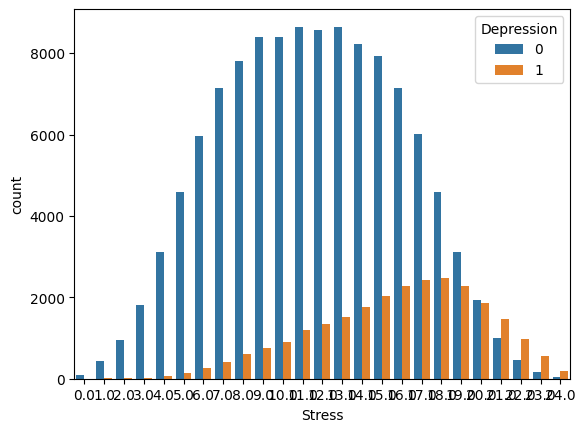

In [211]:
df_train['Stress'] = df_train['Work/Study Hours'] + df_train['Pressure'] + df_train['Financial Stress'] - df_train['Satisfaction'] + 3
df_test['Stress'] = df_test['Work/Study Hours'] + df_test['Pressure'] + df_test['Financial Stress'] - df_test['Satisfaction'] + 3
sns.countplot(data=df_train, x='Stress', hue='Depression')